In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("ps1.ipynb")

# Econ 140 – Problem Set 1

In this problem set we will be doing t-tests, among other things. There are many ways to do t-testing in Python; we will be using a package called `scipy`. More specifically, `scipy`'s `stats` tools. The method that does t-testing of means for two independent samples is `ttest_ind`. [Here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) is the documentation. The documentation for many of the Python packages we will be using is very helpful and you are encouraged to reference it. It will almost always be the fastest way to answer questions about the usage of these packages. We'll go through an example of how to use `ttest_ind`.

Suppose we have a dataset called `coinflips` that has two columns of observations, one called `coin1`, the other `coin2`. Each entry in each column is either a 1 or 0 depending on the result of the coin for a particular flip. If we want to do a t-test for equality of means of the coins (which in this case is also testing if the coins have the same chance of landing on heads) we would do the following:

```python
stats.ttest_ind(coinflips['coin1'], coinflips['coin2'])
```

which would return something like this: Ttest_indResult(statistic=-2.053, pvalue=0.041). These results might indicate that the first coin is probably less likely to land on heads than the second coin. This is because the first argument to `ttest_ind` was `coin1`, and the t-stat is negative. If the t-stat were positive, it might indicate that the first coin is more likely to land on heads. To more clearly see the results, we can append `.statistic` at the end of the `ttest_ind` command to just get -2.053, and `.pvalue` to just get 0.041.

By default, `ttest_ind` assumes a two-sided test. It also assumes equal variance between the two samples. For unequal variance, we can do

```python
stats.ttest_ind(coinflips['coin1'], coinflips['coin2'], equal_var=False)
```

If our data have missing values (we'll see an example of this later in the problem set) `ttest_ind` by default will not give us the results we want (a t-test ignoring the missing values). To tell `scipy` to only consider non-missing values, we do

```python
stats.ttest_ind(coinflips['coin1'], coinflips['coin2'], nan_policy='omit')
```

Before getting started on the assignment, run the cell at the very top that imports `otter` and the cell below which will import the packages we need.

**Important:** As mentioned in problem set 0, if you leave this notebook alone for a while and come back, to save memory datahub will "forget" which code cells you have run, and you may need to restart your kernel and run all of the cells from the top. That includes this code cell that imports packages. If you get `<something> not defined` errors, this is because you didn't run an earlier code cell that you needed to run. It might be this cell or the `otter` cell above.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Problem 1. Golden State Warriors

The 2015-16 season was historic for Stephen Curry and the Golden State Warriors. They finished the regular season with a 73-9 record, which beat out the Chicago Bulls 1995-96 record of 72-10 for the best regular season record in NBA history. This question takes a statistical look at the business of pro basketball. The accompanying dataset `nba.csv` contains information on 269 NBA players for one specific season. Here is a description of some of the variables in the dataset:

| Variable     | Description                                                    |
|:------------ | :------------------------------------------------------------- |
| **wage**     | player's salary for the season in thousands of nominal dollars |
| **exper**    | number of years in the league                                  |
| **age**      | age of the player                                              |
| **coll**     | years of college completed                                     |
| **games**    | number of games played that season                             |
| **minutes**  | total number of minutes player in the season                   |
| **guard**    | dummy indicator whether player plays guard position            |
| **forward**  | dummy indicator whether player plays forward position          |
| **center**   | dummy indicator whether player plays center position           |
| **points**   | season average number of points per game played                |
| **rebounds** | season average number of rebounds per game played              |
| **assists**  | season average number of assists per game played               |

In [3]:
# Don't forget to run this cell that reads in the data
nba = pd.read_csv("nba.csv")
nba.head()

,married,wage,exper,age,coll,games,minutes,guard,forward,center,points,rebounds,assists,draft,allstar,avgmin,black,children
0,1,1002.5,4,27,4,77,2867,1,0,0,16,4,5,19.0,0,37.23,1,0
1,1,2030.0,5,28,4,78,2789,1,0,0,13,3,9,28.0,0,35.76,1,1
2,0,650.0,1,25,4,74,1149,0,0,1,6,3,0,19.0,0,15.53,1,0
3,0,2030.0,5,28,4,47,1178,0,1,0,7,5,2,1.0,0,25.06,1,0
4,0,755.0,3,24,4,82,2096,1,0,0,11,4,3,24.0,0,25.56,1,0


<!-- BEGIN QUESTION -->

**Question 1.a.**
To begin with, test whether players who play the guard position are paid the same as other players. Be sure to report the results of your test including the t-statistic and p-value.

This question is for your code, the next is for your explanation.

*Hint: For those unfamiliar with American basketball, players are classified as playing one of three positions: guard, forward and center.*

<!--
BEGIN QUESTION
name: q1_a
manual: true
-->

In [4]:
nba_guard = nba[nba['guard'] == 1]
nba_not_guard = nba[nba['guard'] == 0]

ttest_1a = stats.ttest_ind(nba_guard['wage'], nba_not_guard['wage'])

tstat_1a = ttest_1a.statistic
pval_1a = ttest_1a.pvalue

print("t-stat: {}".format(tstat_1a))
print("p-value: {}".format(pval_1a))

t-stat: -2.0530342128806582
p-value: 0.041043637620105405


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.b.**
Explain.

<!--
BEGIN QUESTION
name: q1_b
manual: true
-->

This result indicates that players who play the guard position are likely to have lower wage than other players. With a t-stat of -2.05 and a p-value of 0.04, we can reject the null hypothesis that players who play the guard position are paid the same as other players on a significance level of 5%.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.c.**
Do NBA players who complete college degree get paid more or less than those who do not? Test this hypothesis. Explain your results.

This question is for your code, the next is for your explanation.

*Hint: Define a new variable degree to indicate whether the player completed 4 or more years of college.*

<!--
BEGIN QUESTION
name: q1_c
manual: true
-->

In [5]:
nba['degree'] = nba['coll'] >= 4

nba_degree = nba[nba['degree'] == True]
nba_no_degree = nba[nba['degree'] == False]

ttest_1c = stats.ttest_ind(nba_degree['wage'], nba_no_degree['wage'])

tstat_1c = ttest_1c.statistic
pval_1c = ttest_1c.pvalue

print("t-stat: {}".format(tstat_1c))
print("p-value: {}".format(pval_1c))

t-stat: -2.3705333284217867
p-value: 0.0184730432847849


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.d.**
Explain.

<!--
BEGIN QUESTION
name: q1_d
manual: true
-->

We firstly generate a degree variable which indicates whether an NBA player has completed 4 or more years of college. After running a t-test on wage differences, we get a t-stat of -2.37 and a p-value of 0.018. This result indicates that players who have completed 4 or more years of college are more likely to have lower wage than other players. We are also able to reject the null hypothesis that players who have completed 4 or more years of college are paid the same as other players at the 5% significance level. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.e.**
Compute the *productivity* of each player in terms of the average number of points scored per minute of playing time. Note that the variable points is itself an average per game for the sampled season. Test whether guards are as productive as players who play other positions in this sense.

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q1_e
manual: true
-->

In [6]:
nba['productivity'] = nba['points'] / nba['avgmin']

nba_guard = nba[nba['guard'] == 1]
nba_not_guard = nba[nba['guard'] == 0]

ttest_1e = stats.ttest_ind(nba_guard['productivity'], nba_not_guard['productivity'])

tstat_1e = ttest_1e.statistic
pval_1e = ttest_1e.pvalue

print("t-stat: {}".format(tstat_1e))
print("p-value: {}".format(pval_1e))

t-stat: 0.9747612774631449
p-value: 0.3305609817430082


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.f.**
Explain.

<!--
BEGIN QUESTION
name: q1_f
manual: true
-->

We firstly define the productivity variable as average points per game divided by average minute per game for each NBA player. After running a t-test on the productivity difference between guard players and other players, we got a t-stat of 0.97 and a p-value of 0.33. While it looks like players who play guard tend to be more productive than other players with a positive t-stat, the p-value is not small enough for us to reject the null hypothesis that guards are as productive as other players. There is no statistical difference between players who play guard and other players.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.g.**
Players do more on the court than just put the ball in the hoop. They also rebound the ball and assist other players. Data on these two measures are given as a per-game average alongside points. Find the sample correlations between the three performance variables: points, rebounds, and assists.

*Hint: The `.corr()` command is useful here.*

<!--
BEGIN QUESTION
name: q1_g
manual: true
-->

In [7]:
nba[['points', 'assists', 'rebounds']].corr()

,points,assists,rebounds
points,1.000000,0.539269,0.563324
assists,0.539269,1.000000,0.059956
rebounds,0.563324,0.059956,1.000000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.h.**
To take all the performance measures into account, create a performance index as a weighted sum of the three measures: $\text{index} = \text{points}+\text{rebounds}+2\cdot \text{assists}$. Using this index, test whether guards have the same performance as players at other positions.

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q1_h
manual: true
-->

In [8]:
nba['index'] = nba['points'] + nba['rebounds'] + nba['assists']*2

nba_guard = nba[nba['guard'] == 1]
nba_not_guard = nba[nba['guard'] == 0]

ttest_1h = stats.ttest_ind(nba_guard['index'], nba_not_guard['index'])

tstat_1h = ttest_1h.statistic
pval_1h = ttest_1h.pvalue

print("t-stat: {}".format(tstat_1h))
print("p-value: {}".format(pval_1h))

t-stat: 2.1909453801070837
p-value: 0.029320202223591406


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.i.**
Explain.

<!--
BEGIN QUESTION
name: q1_i
manual: true
-->

After running a t-test on the index difference between guard players and other players, we are able to get a t-stat of 2.19 with a p-value of 0.029. This means that guard players are more likely to have a higher performance index than other players. With a p-value of 0.029, we are able to reject the null hypothesis that guard players have the same performance index as other players at a 5% significance level.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.j.**
Finally, NBA general managers are very interested to know whether they are getting their money’s worth, so want to know whether players are over or under paid given their performance. Compute a variable equal to the performance index per \$1,000 of salary and again test whether guards are paid the same relative to performance as other positions.

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q1_j
manual: true
-->

In [9]:
nba['payoff'] = nba['index'] / nba['wage']

nba_guard = nba[nba['guard'] == 1]
nba_not_guard = nba[nba['guard'] == 0]

ttest_1j = stats.ttest_ind(nba_guard['payoff'], nba_not_guard['payoff'])

tstat_1j = ttest_1j.statistic
pval_1j = ttest_1j.pvalue

print("t-stat: {}".format(tstat_1j))
print("p-value: {}".format(pval_1j))

t-stat: 2.546161864697022
p-value: 0.011453727166139413


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.k.**
Explain.

<!--
BEGIN QUESTION
name: q1_k
manual: true
-->

<!-- END QUESTION -->



---

## Problem 2. Crime on Campus

Crime on campus has become a critical national policy issue. This question explores some data collected about crime on a random sample of U.S. colleges and universities in 2001. The accompanying dataset `crime.csv` contains the following variables:

| Variable       | Description                                               |
|:-------------- | :-------------------------------------------------------- |
| **enrollment** | number of full-time enrolled undergrad and grad students  |
| **private**    | 1 if the school is private, and 0 if the school is public |
| **police**     | number of full-time equivalent campus police officers     |
| **crime**      | number of confirmed on-campus crimes per year             |

In [9]:
crime = pd.read_csv("crime.csv")
crime.head()

In [10]:
# This code cell is for question 2.a.


<!-- BEGIN QUESTION -->

**Question 2.a.**
Complete the following table of summary statistics. A code cell has been provided above for you to do your work for this question if you need it. An outline of the table is provided below. Replace the `...` with actual numbers.

*Hint: The command `.describe()` will be useful. For example, if your dataset is called `nba`, the usage is `nba.describe()`.*

<!--
BEGIN QUESTION
name: q2_a
manual: true
-->

|                                     | Enrollment | Police | Crime |
|:----------------------------------- | :--------- | :----- | :---- |
| **Number of observations**          | ... | ... | ... |
| **Sample mean**                     | ... | ... | ... |
| **Sample median**                   | ... | ... | ... |
| **Sample standard deviation**       | ... | ... | ... |
| **Sample mean for public schools**  | ... | ... | ... |
| **Sample mean for private schools** | ... | ... | ... |

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.b.**
Compute the sample correlation between enrollment, police, and crime. Do the values you find make sense?

<!--
BEGIN QUESTION
name: q2_b
manual: true
-->

In [11]:
crime[['enrollment', 'police', 'crime']]...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.c.**
Do the values you find above make sense?

<!--
BEGIN QUESTION
name: q2_c
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.d.**
Test the hypothesis that the crime levels are the same in private and public schools by performing a t-test for equality of means of two subsamples. Is there a difference at the 5% significance level? At the 1% level? Do your conclusions depend on whether you assume the same and different variances for the two types of schools? Explain.

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q2_d
manual: true
-->

In [12]:
crime_public = ...
crime_private = ...

ttest_2d_unequal_var = stats.ttest_ind(..., ..., ...)

tstat_2d_unequal = ttest_2d_unequal_var.statistic
pval_2d_unequal = ttest_2d_unequal_var.pvalue

ttest_2d_equal_var = stats.ttest_ind(..., ...)

tstat_2d_equal = ttest_2d_equal_var.statistic
pval_2d_equal = ttest_2d_equal_var.pvalue

print("t-stat unequal variance: {}".format(tstat_2d_unequal))
print("p-value unequal variance: {}".format(pval_2d_unequal))
print("t-stat equal variance: {}".format(tstat_2d_equal))
print("p-value equal variance: {}".format(pval_2d_equal))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.e.**
Explain.

<!--
BEGIN QUESTION
name: q2_e
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.f.**
Since it is likely that more crimes occur on bigger campuses, generate a new variable called “crimerate,” defined as the number of crimes per 1,000 students. Test whether private and public schools have different crime rates (allowing for potentially unequal variances). Is there a difference at the 5% level? At the 1% level? Do your conclusions depend on whether you assume the same and different variances for the two types of schools? Explain.

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q2_f
manual: true
-->

In [13]:
crime['crimerate'] = ...

crime_public = ...
crime_private = ...

ttest_2f_unequal_var = stats.ttest_ind(..., ..., ...)

tstat_2f_unequal = ttest_2f_unequal_var.statistic
pval_2f_unequal = ttest_2f_unequal_var.pvalue

ttest_2f_equal_var = stats.ttest_ind(..., ...)

tstat_2f_equal = ttest_2f_equal_var.statistic
pval_2f_equal = ttest_2f_equal_var.pvalue

print("t-stat unequal variance: {}".format(tstat_2f_unequal))
print("p-value unequal variance: {}".format(pval_2f_unequal))
print("t-stat equal variance: {}".format(tstat_2f_equal))
print("p-value equal variance: {}".format(pval_2f_equal))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.g.**
Explain.

<!--
BEGIN QUESTION
name: q2_g
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



---

## Problem 3. Post Katrina employment in New Orleans

The following table has information about home location and employment status of New Orleans residents taken from the U.S. Current Population Survey in August 2006, a year after hurricane Katrina inflicted severe damage on the Gulf Coast. Observations are made on 249 randomly selected survey respondents who had to evacuate their home due to the hurricane. The table entries are the number of survey respondents.

|                                   | Employed | Unemployed | Total |
|:--------------------------------- | :------- | :--------- | :---- |
| **Returned to pre-storm address** | 139      | 8          | 147   |
| **Have not yet returned**         | 79       | 23         | 102   |
| **Total**                         | 218      | 31         | 249   |

<!-- BEGIN QUESTION -->

**Question 3.a.**
Create another table with the joint and marginal probabilities associated with this sample. Create another table with the conditional distribution of employment status given whether or not the resident has returned to their home. An outline of the tables is provided below. Replace the `...` with actual numbers. Make sure to show your work for how you derived the tables!

You may either:
* Write your math in the cell below using LaTeX typesetting (recommended).
* Write your math on a tablet and include the exported pdf with the pdf submission of this assignment.
* Write your math on paper and include a scan with the pdf submission of this assignment.

<!--
BEGIN QUESTION
name: q3_a
manual: true
-->

| **Joint**                         | Employed | Unemployed | Marginal |
|:--------------------------------- | :------- | :--------- | :------- |
| **Returned to pre-storm address** | ...      | ...        | ...      |
| **Have not yet returned**         | ...      | ...        | ...      |
| **Marginal**                      | ...      | ...        | ...      |

| **Conditional**                         | Employed | Unemployed |
|:--------------------------------------- | :------- | :--------- |
| **Given returned to pre-storm address** | ...      | ...        |
| **Given have not yet returned**         | ...      | ...        |

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.b.**
Using this last table find the expectation of a resident being employed, conditional on returning to their home. To do this, assign values to the two variables: 1 = returned to home and 0 = did not; 1 = employed and 0 = unemployed. Using the same table, confirm the law of iterated expectations.

You may either:
* Write your math in the cell below using LaTeX typesetting (recommended).
* Write your math on a tablet and include the exported pdf with the pdf submission of this assignment.
* Write your math on paper and include a scan with the pdf submission of this assignment.

<!--
BEGIN QUESTION
name: q3_b
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.c.**
Compute the sample covariance of return status and employment status.

You may either:
* Write your math in the cell below using LaTeX typesetting (recommended).
* Write your math on a tablet and include the exported pdf with the pdf submission of this assignment.
* Write your math on paper and include a scan with the pdf submission of this assignment.

<!--
BEGIN QUESTION
name: q3_c
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.d.**
Is current employment status statistically independent of the return status? Along with part 3.c, what does this say about the relationship between return status and employment status? Justify your answer.

<!--
BEGIN QUESTION
name: q3_d
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.e.**
Give two plausible reasons that could explain the difference in employment status between the residents who returned to their homes and those who did not.

<!--
BEGIN QUESTION
name: q3_e
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



---

## Problem 4. Pollution

For this question, we will use a dataset on pollution. It contains information on the gross domestic product (GDP) and yearly CO2 emissions of 214 countries for the year 2010. You will find that the variable names clearly indicate what they measure, e.g. `co2pc` is CO2 per capita. Notice there are some missing values, which you can see from the `NaN` (not a number) entries in some places in the data.

In [10]:
pollution = pd.read_csv("pollution.csv")
pollution.head()

,year,countryname,countrycode,gdp,gdppc,co2,co2pc,population,oecd
0,2010,Zambia,ZMB,9.799629e+09,741.4421,2427.554,0.183669,13216985,0.0
1,2010,French Polynesia,PYF,NaN,NaN,883.747,3.296764,268065,0.0
2,2010,Monaco,MCO,NaN,NaN,NaN,NaN,36845,0.0
3,2010,Ukraine,UKR,9.057726e+10,1974.6212,304804.720,6.644867,45870700,0.0
4,2010,"Venezuela, RB",VEN,1.750000e+11,6010.0270,201747.340,6.946437,29043283,0.0


In [37]:
# This code cell is for question 4.a.
oecd = pollution[pollution['oecd'] == 1]
not_oecd = pollution[pollution['oecd'] == 0]

gdp_mean = np.mean(oecd['gdppc'])
gdp_std = np.std(oecd['gdppc'], ddof=1)
print('The sample mean of per-capita GDP for OECD countries is', gdp_mean, 'and the standard deviation is', gdp_std)

gdp_mean_2 = np.mean(not_oecd['gdppc'])
gdp_std_2 = np.std(not_oecd['gdppc'], ddof=1)
print('The sample mean of per-capita GDP for non-OECD countries is', gdp_mean_2, 'and the standard deviation is', gdp_std_2)

The sample mean of per-capita GDP for OECD countries is 31423.908076470587 and the standard deviation is 17180.8788352348
The sample mean of per-capita GDP for non-OECD countries is 5585.894420199999 and the standard deviation is 9827.86277190887


In [38]:
# This code cell is for question 4.a.
co2_mean = np.mean(oecd['co2pc'])
co2_std = np.std(oecd['co2pc'], ddof=1)
print('The sample mean of per-capita CO2 emission for OECD countries is', co2_mean, 'and the standard deviation is', co2_std)

co2_mean_2 = np.mean(not_oecd['co2pc'])
co2_std_2 = np.std(not_oecd['co2pc'], ddof=1)
print('The sample mean of per-capita CO2 emission for non-OECD countries is', co2_mean_2, 'and the standard deviation is', co2_std_2)

The sample mean of per-capita CO2 emission for OECD countries is 8.984034323529412 and the standard deviation is 4.09993299797414
The sample mean of per-capita CO2 emission for non-OECD countries is 4.074291427865854 and the standard deviation is 6.430326784561685


<!-- BEGIN QUESTION -->

**Question 4.a.**
The variable `oecd` is a dummy indicator of each country’s membership in the Organization for Economic Cooperation and Development (OECD): 1 = a member in OECD, 0 = not a member. The OECD consists of several dozen of the largest, most developed economies in the world. Compare the sample mean and standard deviation of per-capita GDP between the OECD and non-OECD countries. Do the same with per-capita CO2 emissions. A code cell has been provided for you above to do your work for this question.

<!--
BEGIN QUESTION
name: q4_a
manual: True
-->

From the summary of OECD countries and non-OECD countries, we can see that OECD countries have a mean per-capita GDP of 31424 with a standard deviation of 17181, while non-OECD countries have a mean per-capita GDP of 5586 with a standard deviation of 9828. On average, OECD countries have a much higher per-capita GDP than non-OECD countries, although the standard deviation is also greater than non-OECD countries.
In terms of per-capita CO2 emissions, OECD countries have a mean per-capita CO2 emission of 8.98 with a standard deviation of 4.03; while non-OECD countries have a mean per-capita CO2 emission of 4.10 with a standard deviation of 6.43. On average, OECD countries have a higher mean per-capita CO2 emission than non-OECD countries, while the standard deviation is also smaller than non-OECD countries.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.b.**
Conduct a t-test of whether the sample means of CO2 emissions per-capita are significantly different between the OECD and non-OECD countries. Did you choose to assume variances of the two groups were equal or unequal? Explain why.

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q4_b
manual: true
-->

In [14]:
pollution_oecd = pollution[pollution['oecd'] == 1]
pollution_no_oecd = pollution[pollution['oecd'] == 0]

ttest_4b = stats.ttest_ind(pollution_oecd['co2pc'], pollution_no_oecd['co2pc'], equal_var=False, nan_policy='omit')

tstat_4b = ttest_4b.statistic
pval_4b = ttest_4b.pvalue

print("t-stat: {}".format(tstat_4b))
print("p-value: {}".format(pval_4b))

t-stat: 5.682465161974535
p-value: 2.6835812931694e-07


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.c.**
Explain.

<!--
BEGIN QUESTION
name: q4_c
manual: true
-->

Here, we ran a t-test on the difference of sample means of CO2 emissions per-capita between OECD and non-OECD countries. Based on the vast difference in variances between OECD and non-OECD countries' CO2 emissions per-capita, it should be safe to assume unequal variance for the two samples. The result of the t-test indicates that OECD countries have a higher sample mean of CO2 emissions per-capita than non-OECD countries, sicne the t-stat is positive. With a t-stat of 5.682 and a p-value of 2.68e**(-7), we can reject the null hypothesis that OECD and non-OECD countries have the same mean of per-capita CO2 emissions at a 1% significance level.

<!-- END QUESTION -->



In the remaining parts, we will explore the relationship between GDP and CO2 emissions. This relationship has also been called the “Environmental Kuznets Curve.”

<!-- BEGIN QUESTION -->

**Question 4.d.**
Approximate the growth rates of GDP and CO2 by first generating variables that are the natural logarithms of the two variables. Why would we examine the growth rates instead of the absolute levels of emissions and GDP? The function `np.log()` will be helpful. It can take a column as an argument in the parentheses. For example, if we wanted to take the natural log of a number instead of a column we would do `np.log(10)`. `np` is the shortcut for `numpy`, which is another useful package for doing math.

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q4_d
manual: true
-->

In [15]:
pollution['log_gdp'] = np.log(pollution['gdp'])
pollution['log_co2'] = np.log(pollution['co2'])

pollution.head()

,year,countryname,countrycode,gdp,gdppc,co2,co2pc,population,oecd,log_gdp,log_co2
0,2010,Zambia,ZMB,9.799629e+09,741.4421,2427.554,0.183669,13216985,0.0,23.005610,7.794639
1,2010,French Polynesia,PYF,NaN,NaN,883.747,3.296764,268065,0.0,NaN,6.784171
2,2010,Monaco,MCO,NaN,NaN,NaN,NaN,36845,0.0,NaN,NaN
3,2010,Ukraine,UKR,9.057726e+10,1974.6212,304804.720,6.644867,45870700,0.0,25.229469,12.627427
4,2010,"Venezuela, RB",VEN,1.750000e+11,6010.0270,201747.340,6.946437,29043283,0.0,25.888052,12.214771


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.e.**
Explain.

<!--
BEGIN QUESTION
name: q4_e
manual: true
-->

We take the natural logarithms of the two variables because there are countries whose gdp and co2 are especially higher than other countries. If we only use the absolute levels of the two variables, we will have a large range of data, making it hard to visualize the relationship between the two variables (for instance, from the scatterplot of the abosolute levels below, we can see that the data contains a few significant outliers). By comparison, taking the logarithms of variables will significantly narrow the range of data and help to create more effective visualizations. 

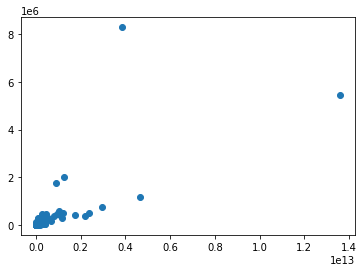

In [17]:
plt.scatter(pollution['gdp'], pollution['co2'])

<!-- END QUESTION -->



Below is code that generates a scatterplot of the two variables created in part 4.d. Run it. `plt.scatter()` takes in two columns from our data and generates a scatterplot. The first column you give it corresponds to the x-axis, the second column the y-axis. `plt.xlabel()` and `plt.ylabel()` just give names to the axes. The `;` at the end of the code is just there to suppress an output that isn't really helpful.

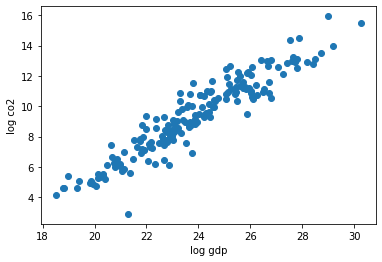

In [16]:
plt.scatter(pollution['log_gdp'], pollution['log_co2'])
plt.xlabel("log gdp")
plt.ylabel("log co2");

<!-- BEGIN QUESTION -->

**Question 4.f.**
Some countries with relatively high GDP might argue that their large population size – rather than carbon-intensive technology – drives high emissions. As a quick test on this claim, draw a scatterplot with the growth rates of per-capita GDP on the x-axis and the growth rates of per-capita emissions on the y-axis. You will need to generate these new variables/columns. To generate the plot you can mimic the code above but with your new variables in the right parts. Compare the resulting figure with the previous figure. Do you think the claim of the high-GDP countries is convincing? Explain.

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q4_f
manual: true
-->

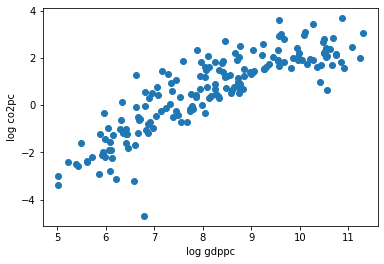

In [18]:
pollution['log_gdppc'] = np.log(pollution['gdppc'])
pollution['log_co2pc'] = np.log(pollution['co2pc'])

plt.scatter(pollution['log_gdppc'], pollution['log_co2pc'])
plt.xlabel("log gdppc")
plt.ylabel("log co2pc");

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.g.**
Explain.

<!--
BEGIN QUESTION
name: q4_g
manual: true
-->

Even if we emit the influence from population size by taking the two variables at per-capita level, we can still see that the two variables are positively related. From the visualization above, we can see that the relationship exhibits a concave shape, as co2 growth rate increases at a slower rate for countries with higher GDP growth rates. This indicates that the relationship between co2 growth rate and gdp growth rate could be quadratic. However, since the two variables are definitely positively related, I don't think the claim of the high-GDP countries is convincing. 

<!-- END QUESTION -->



---

## Problem 5. Wages in Los Angeles

The dataset for this question contains information on several indicators for about 800 workers in the Los Angeles metropolitan area: hourly wages (`wage`), years of schooling (`education`), gender (`female`), years of work experience (`exp`), US citizen status (`citizen`), African-American status (`black`), and Hispanic origin (`hispanic`). The sample is taken from the 1990 Census of the Population.

In [19]:
la = pd.read_csv("la.csv")
la.head()

,hispanic,citizen,black,exp,wage,female,education
0,1,1,0,14.0,5.288462,1,9
1,0,1,0,14.7,8.461538,1,13
2,0,1,0,14.7,10.416667,1,13
3,0,1,0,14.0,21.634615,1,14
4,1,0,0,12.0,3.365385,1,12


<!-- BEGIN QUESTION -->

**Question 5.a.**
Display summary statistics for this dataset that include at least the mean and interquartile range for each variable. You learned a command earlier in this assignment that does this.

<!--
BEGIN QUESTION
name: q5_a
manual: true
-->

In [20]:
la.describe()

,hispanic,citizen,black,exp,wage,female,education
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,0.367323,0.717265,0.088065,12.494044,13.413861,0.424102,12.864426
std,0.482355,0.450590,0.283554,1.605983,14.659279,0.494492,3.194241
min,0.000000,0.000000,0.000000,10.000000,1.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,11.000000,6.500000,0.000000,12.000000
50%,0.000000,1.000000,0.000000,12.700000,10.576923,0.000000,13.000000
75%,1.000000,1.000000,0.000000,14.000000,15.723952,1.000000,16.000000
max,1.000000,1.000000,1.000000,15.000000,250.661540,1.000000,20.000000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5.b.**
Display a histogram *with 80 bins* of the wage variable. The histogram must have 80 bins. [This](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) is the documentation for the `.hist()` command for `pandas`, which may be helpful. The documentation for the `pandas` library is excellent and you are highly encouraged to reference it throughout the course.

*Hint: If you wanted to generate a 40-bin histogram for the `exp` variable, the command would look like `la.hist(column='exp', bins=40)`.*

<!--
BEGIN QUESTION
name: q5_b
manual: true
-->

array([[<AxesSubplot:title={'center':'wage'}>]], dtype=object)

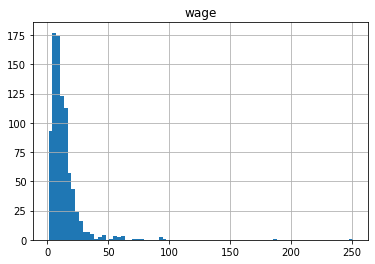

In [21]:
la.hist(column='wage', bins=80)

<!-- END QUESTION -->

In [22]:
# This code cell is for question 5.c.
la.skew()

hispanic     0.551398
citizen     -0.966600
black        2.912268
exp          0.063841
wage         8.186265
female       0.307686
education   -0.683289
dtype: float64

<!-- BEGIN QUESTION -->

**Question 5.c.**
Is the distribution skewed in any way? You don't have to code for this part if you don't want to, a qualitative description is enough, but you can check quantitatively by doing `la.skew()`. If you do want to try this, use the code cell provided.

<!--
BEGIN QUESTION
name: q5_c
manual: true
-->

Yes, the distribution is asymmetric and skewed to the right. From the code above, we can also see that its skewness is 8.19 which confirms the distribution is positively skewed.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5.d.**
Wages and earnings are often studied by first taking logarithms. Transform wage by taking its natural logarithm.

<!--
BEGIN QUESTION
name: q5_d
manual: true
-->

In [23]:
la['log_wage'] = np.log(la['wage'])

la.head()

,hispanic,citizen,black,exp,wage,female,education,log_wage
0,1,1,0,14.0,5.288462,1,9,1.665527
1,0,1,0,14.7,8.461538,1,13,2.135531
2,0,1,0,14.7,10.416667,1,13,2.343407
3,0,1,0,14.0,21.634615,1,14,3.074295
4,1,0,0,12.0,3.365385,1,12,1.213542


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5.e.**
Compute the frequencies of years of schooling (education). The `.value_counts()` method will be useful. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) is the documentation. For the `subset` parameter, you will want to set that equal to `'education'` (with the quote marks on either side; if you don't know why we need the quote marks, it might be worthwhile revisiting the Python assignment). You will also probably want to set the `sort` parameter equal to `False` because otherwise it will sort by count instead of education level, which might not be as helpful in this context. Set `normalize` to `True`. This will give proportions instead of counts. You don't have to do specify anything for the `ascending` parameter, it will default to `False` if you don't tell `pandas` what to do there.

<!--
BEGIN QUESTION
name: q5_e
manual: true
-->

In [25]:
la.value_counts(subset='education', sort=False, normalize=True)

education
0     0.005794
3     0.012746
7     0.068366
9     0.033604
10    0.030127
11    0.086906
12    0.201622
13    0.224797
14    0.063731
16    0.179606
18    0.086906
20    0.005794
dtype: float64

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5.f.**
Construct a scatterplot of log wages and years of schooling, with schooling on the x-axis and wages on the y-axis. Refer to how we used `plt.scatter()` earlier in the problem set if you don't recall how to make a scatterplot. Make sure to label your axes!

<!--
BEGIN QUESTION
name: q5_f
manual: true
-->

Text(0, 0.5, 'wages')

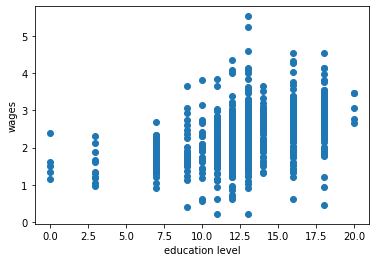

In [26]:
plt.scatter(la['education'], la['log_wage'])
plt.xlabel('education level')
plt.ylabel('wages')

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.to_pdf(pagebreaks=False, display_link=True)